In [1]:
import numpy as np
import pandas as pd

# How to Think About Group Operations

In [2]:
df = pd.DataFrame(
    {
        "key1" : pd.Series(["a", "a", None, "b", "b", "a", None], dtype= 'string'),
        "key2" : pd.Series([1, 2, 1, 2, 1, None, 1], dtype="Int64"),
        "data1" : np.random.standard_normal(7),
        "data2" : np.random.standard_normal(7)
    }
)

In [3]:
df

,key1,key2,data1,data2
0,a,1,-0.267222,-0.382133
1,a,2,0.610212,-0.440766
2,<NA>,1,-0.654692,0.040122
3,b,2,1.057471,1.723456
4,b,1,1.288035,-0.320803
5,a,<NA>,-0.947199,0.562522
6,<NA>,1,0.201355,-0.454336


In [4]:
grouped = df.data1.groupby(df.key1)

In [5]:
grouped

In [6]:
grouped.mean()

key1
a   -0.201403
b    1.172753
Name: data1, dtype: float64

In [7]:
means = df.data1.groupby([df.key1, df.key2]).mean()

In [8]:
means

key1  key2
a     1      -0.267222
      2       0.610212
b     1       1.288035
      2       1.057471
Name: data1, dtype: float64

In [9]:
means.index

MultiIndex([('a', 1),
            ('a', 2),
            ('b', 1),
            ('b', 2)],
           names=['key1', 'key2'])

In [10]:
means.unstack()

key2,1,2
key1,,
a,-0.267222,0.610212
b,1.288035,1.057471


In [11]:
states = np.array(["OH", "CA", "CA", "OH", "OH", "CA", "OH"])
years = [2005, 2005, 2006, 2005, 2006, 2005, 2006]

In [12]:
df.data1.groupby([states, years]).mean()

CA  2005   -0.168493
    2006   -0.654692
OH  2005    0.395125
    2006    0.744695
Name: data1, dtype: float64

In [13]:
df.groupby('key1').mean()

,key2,data1,data2
key1,,,
a,1.5,-0.201403,-0.086792
b,1.5,1.172753,0.701326


In [14]:
df.loc[:, df.columns != 'key1'].groupby('key2').mean()

,data1,data2
key2,,
1,0.141869,-0.279288
2,0.833842,0.641345


In [15]:
df.groupby('key2')[['data1', 'data2']].mean()

,data1,data2
key2,,
1,0.141869,-0.279288
2,0.833842,0.641345


In [16]:
df.groupby(['key1', 'key2']).mean()

data1     data2
key1 key2                    
a    1    -0.267222 -0.382133
     2     0.610212 -0.440766
b    1     1.288035 -0.320803
     2     1.057471  1.723456

In [17]:
df.groupby('key1').size()

key1
a    3
b    2
dtype: int64

In [18]:
df.groupby(['key1', 'key2'], dropna= False).size()

key1  key2
a     1       1
      2       1
      <NA>    1
b     1       1
      2       1
<NA>  1       2
dtype: int64

In [19]:
df.groupby('key1').count()

,key2,data1,data2
key1,,,
a,2,3,3
b,2,2,2


## Iterating over Groups

In [20]:
for i in df.groupby('key1'):
    print(i)

('a',   key1  key2     data1     data2
0    a     1 -0.267222 -0.382133
1    a     2  0.610212 -0.440766
5    a  <NA> -0.947199  0.562522)
('b',   key1  key2     data1     data2
3    b     2  1.057471  1.723456
4    b     1  1.288035 -0.320803)


In [21]:
for name, group in df.groupby('key1'):
    print(name, group, sep= '\n')

a
  key1  key2     data1     data2
0    a     1 -0.267222 -0.382133
1    a     2  0.610212 -0.440766
5    a  <NA> -0.947199  0.562522
b
  key1  key2     data1     data2
3    b     2  1.057471  1.723456
4    b     1  1.288035 -0.320803


In [22]:
for (k1, k2), group in df.groupby(['key1', 'key2']):
    print((k1, k2))
    print(group)

('a', 1)
  key1  key2     data1     data2
0    a     1 -0.267222 -0.382133
('a', 2)
  key1  key2     data1     data2
1    a     2  0.610212 -0.440766
('b', 1)
  key1  key2     data1     data2
4    b     1  1.288035 -0.320803
('b', 2)
  key1  key2     data1     data2
3    b     2  1.057471  1.723456


In [23]:
pieces = {
    name: group for name, group in df.groupby('key1')
}

In [24]:
pieces['b']

,key1,key2,data1,data2
3,b,2,1.057471,1.723456
4,b,1,1.288035,-0.320803


In [25]:
grouped = df.groupby(
    {
        'key1': 'key',
        'key2': 'key',
        'data1': 'data',
        'data2': 'data'
    },
    axis= 1
)

In [26]:
for col, group in grouped:
    print(col, group, sep= '\n')

data
      data1     data2
0 -0.267222 -0.382133
1  0.610212 -0.440766
2 -0.654692  0.040122
3  1.057471  1.723456
4  1.288035 -0.320803
5 -0.947199  0.562522
6  0.201355 -0.454336
key
   key1  key2
0     a     1
1     a     2
2  <NA>     1
3     b     2
4     b     1
5     a  <NA>
6  <NA>     1


## Selecting a column or subset of columns

In [27]:
df.groupby('key1')['data1'].mean()

key1
a   -0.201403
b    1.172753
Name: data1, dtype: float64

In [28]:
df.groupby(['key1', 'key2'])[['data2']].mean()

data2
key1 key2          
a    1    -0.382133
     2    -0.440766
b    1    -0.320803
     2     1.723456

## Grouping with Dictionaries and Series

In [29]:
people = pd.DataFrame(
    np.random.standard_normal((5, 5)),
    columns=["a", "b", "c", "d", "e"],
    index=["Joe", "Steve", "Wanda", "Jill", "Trey"]
)
people.iloc[2:3, [1, 2]] = np.nan

In [30]:
people

,a,b,c,d,e
Joe,0.872282,0.156284,-1.313454,-0.322832,-2.508776
Steve,-0.642591,0.921554,0.149261,0.553680,0.099916
Wanda,0.251348,NaN,NaN,0.882082,0.627131
Jill,2.537531,-0.311166,-0.549975,-1.988012,-0.300272
Trey,0.795852,0.727704,-0.063822,-0.791997,2.302929


In [31]:
mapping = {
    'a': 'red',
    'b': 'blue',
    'c': 'blue',
    'd': 'blue',
    'e': 'red',
    'f': 'red'
}

In [32]:
people.groupby(mapping, axis= 1).sum()

,blue,red
Joe,-1.480001,-1.636494
Steve,1.624495,-0.542675
Wanda,0.882082,0.878479
Jill,-2.849154,2.237259
Trey,-0.128115,3.098780


In [33]:
map_series = pd.Series(mapping)

In [34]:
map_series

a     red
b    blue
c    blue
d    blue
e     red
f     red
dtype: object

In [35]:
people.groupby(map_series, axis= 1).count()

,blue,red
Joe,3,2
Steve,3,2
Wanda,1,2
Jill,3,2
Trey,3,2


## Grouping with Function

In [36]:
people.groupby(len).sum()

,a,b,c,d,e
3,0.872282,0.156284,-1.313454,-0.322832,-2.508776
4,3.333383,0.416537,-0.613797,-2.780009,2.002656
5,-0.391243,0.921554,0.149261,1.435762,0.727047


In [37]:
key_list = ['one', 'one', 'one', 'two', 'two']

In [38]:
people.groupby([len, key_list]).sum()

,,a,b,c,d,e
3,one,0.872282,0.156284,-1.313454,-0.322832,-2.508776
4,two,3.333383,0.416537,-0.613797,-2.780009,2.002656
5,one,-0.391243,0.921554,0.149261,1.435762,0.727047


In [39]:
people.groupby([len, key_list]).min()

,,a,b,c,d,e
3,one,0.872282,0.156284,-1.313454,-0.322832,-2.508776
4,two,0.795852,-0.311166,-0.549975,-1.988012,-0.300272
5,one,-0.642591,0.921554,0.149261,0.553680,0.099916


## Grouping by Index Levels

In [40]:
columns= pd.MultiIndex.from_arrays(
    [
        ['us', 'us', 'jp', 'jp', 'us'],
        [1, 2, 3, 4, 5]
    ],
    names= ['city', 'number']
)

In [41]:
df2 = pd.DataFrame(np.random.standard_normal((6, 5)), columns= columns)

In [42]:
df2

city          us                  jp                  us
number         1         2         3         4         5
0      -1.175607  0.465238  0.453378 -0.393448 -1.547868
1      -0.271453 -1.759469 -0.908556  0.681193 -1.008030
2      -0.142652 -0.079027 -0.537315 -1.237415 -0.414238
3      -2.602353  0.582463 -0.476881  0.077418 -0.428176
4       2.559340  2.261998  0.615744  1.412053 -0.905197
5       0.780771 -0.695609  0.754598 -1.901402 -0.267961

In [43]:
df2.groupby(level= 'city', axis= 1).count()

city,jp,us
0,2,3
1,2,3
2,2,3
3,2,3
4,2,3
5,2,3


# Data Aggregation

In [44]:
df.loc[[1, 2], 'data1'] = 0

In [45]:
df

,key1,key2,data1,data2
0,a,1,-0.267222,-0.382133
1,a,2,0.000000,-0.440766
2,<NA>,1,0.000000,0.040122
3,b,2,1.057471,1.723456
4,b,1,1.288035,-0.320803
5,a,<NA>,-0.947199,0.562522
6,<NA>,1,0.201355,-0.454336


In [46]:
df.groupby('key1').any()

,key2,data1,data2
key1,,,
a,True,True,True
b,True,True,True


In [47]:
df.groupby('key1').all()

,key2,data1,data2
key1,,,
a,True,False,True
b,True,True,True


In [48]:
df.groupby(['key1', 'key2']).cummin()

,data1,data2
0,-0.267222,-0.382133
1,0.000000,-0.440766
2,NaN,NaN
3,1.057471,1.723456
4,1.288035,-0.320803
5,NaN,NaN
6,NaN,NaN


In [49]:
df.groupby(['key1', 'key2']).max()

data1     data2
key1 key2                    
a    1    -0.267222 -0.382133
     2     0.000000 -0.440766
b    1     1.288035 -0.320803
     2     1.057471  1.723456

In [50]:
df.groupby('key1').nth(2)

,key1,key2,data1,data2
5,a,<NA>,-0.947199,0.562522


In [51]:
df.groupby('key1')['data1'].nsmallest(2)

key1   
a     5   -0.947199
      0   -0.267222
b     3    1.057471
      4    1.288035
Name: data1, dtype: float64

In [52]:
def peak_to_peak(arr) -> int:
    return arr.max() - arr.min()

In [53]:
df.groupby('key1').agg(peak_to_peak)

,key2,data1,data2
key1,,,
a,1,0.947199,1.003287
b,1,0.230563,2.044260


In [54]:
df.groupby('key1').describe()

key2                                           data1            ...  \
     count mean       std  min   25%  50%   75%  max count      mean  ...   
key1                                                                  ...   
a      2.0  1.5  0.707107  1.0  1.25  1.5  1.75  2.0   3.0 -0.404807  ...   
b      2.0  1.5  0.707107  1.0  1.25  1.5  1.75  2.0   2.0  1.172753  ...   

                         data2                                          \
           75%       max count      mean       std       min       25%   
key1                                                                     
a    -0.133611  0.000000   3.0 -0.086792  0.563086 -0.440766 -0.411449   
b     1.230394  1.288035   2.0  0.701326  1.445510 -0.320803  0.190262   

                                    
           50%       75%       max  
key1                                
a    -0.382133  0.090194  0.562522  
b     0.701326  1.212391  1.723456  

[2 rows x 24 columns]

## Column-Wise and Multiple Function Application

In [56]:
tips = pd.read_csv('examples/tips.csv')

In [57]:
tips.head()

,total_bill,tip,smoker,day,time,size
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3
2,21.01,3.50,No,Sun,Dinner,3
3,23.68,3.31,No,Sun,Dinner,2
4,24.59,3.61,No,Sun,Dinner,4


In [58]:
tips['tip_percentage'] = tips['tip'] / tips['total_bill']

In [59]:
tips.head()

,total_bill,tip,smoker,day,time,size,tip_percentage
0,16.99,1.01,No,Sun,Dinner,2,0.059447
1,10.34,1.66,No,Sun,Dinner,3,0.160542
2,21.01,3.50,No,Sun,Dinner,3,0.166587
3,23.68,3.31,No,Sun,Dinner,2,0.139780
4,24.59,3.61,No,Sun,Dinner,4,0.146808


In [60]:
grouped = tips.groupby(['day', 'smoker'])

In [61]:
grouped_percentage = grouped['tip_percentage']

In [62]:
grouped_percentage.agg('mean')

day   smoker
Fri   No        0.151650
      Yes       0.174783
Sat   No        0.158048
      Yes       0.147906
Sun   No        0.160113
      Yes       0.187250
Thur  No        0.160298
      Yes       0.163863
Name: tip_percentage, dtype: float64

In [63]:
grouped_percentage.agg(['mean', 'std', peak_to_peak])

mean       std  peak_to_peak
day  smoker                                  
Fri  No      0.151650  0.028123      0.067349
     Yes     0.174783  0.051293      0.159925
Sat  No      0.158048  0.039767      0.235193
     Yes     0.147906  0.061375      0.290095
Sun  No      0.160113  0.042347      0.193226
     Yes     0.187250  0.154134      0.644685
Thur No      0.160298  0.038774      0.193350
     Yes     0.163863  0.039389      0.151240

In [64]:
grouped_percentage.agg([('half_mean', lambda x: x.mean() / 2)])

half_mean
day  smoker           
Fri  No       0.075825
     Yes      0.087392
Sat  No       0.079024
     Yes      0.073953
Sun  No       0.080056
     Yes      0.093625
Thur No       0.080149
     Yes      0.081932

In [65]:
grouped_percentage.agg([('average', 'mean'), ('standard_deviation', np.std)])

average  standard_deviation
day  smoker                              
Fri  No      0.151650            0.028123
     Yes     0.174783            0.051293
Sat  No      0.158048            0.039767
     Yes     0.147906            0.061375
Sun  No      0.160113            0.042347
     Yes     0.187250            0.154134
Thur No      0.160298            0.038774
     Yes     0.163863            0.039389

In [66]:
result = grouped[['tip_percentage', 'total_bill']].agg(['count', 'mean', 'max'])

In [67]:
result

tip_percentage                     total_bill                  
                     count      mean       max      count       mean    max
day  smoker                                                                
Fri  No                  4  0.151650  0.187735          4  18.420000  22.75
     Yes                15  0.174783  0.263480         15  16.813333  40.17
Sat  No                 45  0.158048  0.291990         45  19.661778  48.33
     Yes                42  0.147906  0.325733         42  21.276667  50.81
Sun  No                 57  0.160113  0.252672         57  20.506667  48.17
     Yes                19  0.187250  0.710345         19  24.120000  45.35
Thur No                 45  0.160298  0.266312         45  17.113111  41.19
     Yes                17  0.163863  0.241255         17  19.190588  43.11

In [68]:
result['tip_percentage']

count      mean       max
day  smoker                           
Fri  No          4  0.151650  0.187735
     Yes        15  0.174783  0.263480
Sat  No         45  0.158048  0.291990
     Yes        42  0.147906  0.325733
Sun  No         57  0.160113  0.252672
     Yes        19  0.187250  0.710345
Thur No         45  0.160298  0.266312
     Yes        17  0.163863  0.241255

In [69]:
(
    grouped[['tip_percentage', 'total_bill']]
    .agg([
            ('Average', 'mean'),
            ('Variance', np.var)
        ])
)

tip_percentage           total_bill            
                   Average  Variance    Average    Variance
day  smoker                                                
Fri  No           0.151650  0.000791  18.420000   25.596333
     Yes          0.174783  0.002631  16.813333   82.562438
Sat  No           0.158048  0.001581  19.661778   79.908965
     Yes          0.147906  0.003767  21.276667  101.387535
Sun  No           0.160113  0.001793  20.506667   66.099980
     Yes          0.187250  0.023757  24.120000  109.046044
Thur No           0.160298  0.001503  17.113111   59.625081
     Yes          0.163863  0.001551  19.190588   69.808518

In [70]:
grouped.agg(
    {
        'tip': np.max,
        'size': 'sum'
    }
)

tip  size
day  smoker             
Fri  No       3.50     9
     Yes      4.73    31
Sat  No       9.00   115
     Yes     10.00   104
Sun  No       6.00   167
     Yes      6.50    49
Thur No       6.70   112
     Yes      5.00    40

In [71]:
grouped.agg(
    {
        'tip': ['count', 'min', 'max', 'mean'],
        'size': 'sum'
    }
)

tip                        size
            count   min    max      mean  sum
day  smoker                                  
Fri  No         4  1.50   3.50  2.812500    9
     Yes       15  1.00   4.73  2.714000   31
Sat  No        45  1.00   9.00  3.102889  115
     Yes       42  1.00  10.00  2.875476  104
Sun  No        57  1.01   6.00  3.167895  167
     Yes       19  1.50   6.50  3.516842   49
Thur No        45  1.25   6.70  2.673778  112
     Yes       17  2.00   5.00  3.030000   40

## Returning Aggregated Data Without Row Indexes

In [72]:
tips.groupby(['day', 'smoker'], as_index= False)[['total_bill', 'tip', 'size', 'tip_percentage']].mean()

,day,smoker,total_bill,tip,size,tip_percentage
0,Fri,No,18.420000,2.812500,2.250000,0.151650
1,Fri,Yes,16.813333,2.714000,2.066667,0.174783
2,Sat,No,19.661778,3.102889,2.555556,0.158048
3,Sat,Yes,21.276667,2.875476,2.476190,0.147906
4,Sun,No,20.506667,3.167895,2.929825,0.160113
5,Sun,Yes,24.120000,3.516842,2.578947,0.187250
6,Thur,No,17.113111,2.673778,2.488889,0.160298
7,Thur,Yes,19.190588,3.030000,2.352941,0.163863


# Apply: General split-apply-combine

In [73]:
def top(df: pd.DataFrame, n: int = 5, column: str = 'tip_percentage') -> pd.DataFrame:
    return df.sort_values(by= column, ascending= False).head(n)

In [74]:
top(tips)

,total_bill,tip,smoker,day,time,size,tip_percentage
172,7.25,5.15,Yes,Sun,Dinner,2,0.710345
178,9.60,4.00,Yes,Sun,Dinner,2,0.416667
67,3.07,1.00,Yes,Sat,Dinner,1,0.325733
232,11.61,3.39,No,Sat,Dinner,2,0.291990
183,23.17,6.50,Yes,Sun,Dinner,4,0.280535


In [75]:
tips.groupby('smoker').apply(top)

total_bill   tip smoker   day    time  size  tip_percentage
smoker                                                                 
No     232       11.61  3.39     No   Sat  Dinner     2        0.291990
       149        7.51  2.00     No  Thur   Lunch     2        0.266312
       51        10.29  2.60     No   Sun  Dinner     2        0.252672
       185       20.69  5.00     No   Sun  Dinner     5        0.241663
       88        24.71  5.85     No  Thur   Lunch     2        0.236746
Yes    172        7.25  5.15    Yes   Sun  Dinner     2        0.710345
       178        9.60  4.00    Yes   Sun  Dinner     2        0.416667
       67         3.07  1.00    Yes   Sat  Dinner     1        0.325733
       183       23.17  6.50    Yes   Sun  Dinner     4        0.280535
       109       14.31  4.00    Yes   Sat  Dinner     2        0.279525

In [76]:
tips.groupby(['smoker', 'day']).apply(top, n= 2, column= 'total_bill')

total_bill    tip smoker   day    time  size  tip_percentage
smoker day                                                                   
No     Fri  94        22.75   3.25     No   Fri  Dinner     2        0.142857
            91        22.49   3.50     No   Fri  Dinner     2        0.155625
       Sat  212       48.33   9.00     No   Sat  Dinner     4        0.186220
            59        48.27   6.73     No   Sat  Dinner     4        0.139424
       Sun  156       48.17   5.00     No   Sun  Dinner     6        0.103799
            112       38.07   4.00     No   Sun  Dinner     3        0.105070
       Thur 142       41.19   5.00     No  Thur   Lunch     5        0.121389
            85        34.83   5.17     No  Thur   Lunch     4        0.148435
Yes    Fri  95        40.17   4.73    Yes   Fri  Dinner     4        0.117750
            90        28.97   3.00    Yes   Fri  Dinner     2        0.103555
       Sat  170       50.81  10.00    Yes   Sat  Dinner     3        0.196812
            102       44.30   2.50    Yes   Sat  Dinner     3        0.056433
       Sun  182       45.35   3.50    Yes   Sun  Dinner     3        0.077178
            184       40.55   3.00    Yes   Sun  Dinner     2        0.073983
       Thur 197       43.11   5.00    Yes  Thur   Lunch     4        0.115982
            83        32.68   5.00    Yes  Thur   Lunch     2        0.152999

In [77]:
result = tips.groupby('smoker')['tip_percentage'].describe()

In [78]:
result

,count,mean,std,min,25%,50%,75%,max
smoker,,,,,,,,
No,151.0,0.159328,0.039910,0.056797,0.136906,0.155625,0.185014,0.291990
Yes,93.0,0.163196,0.085119,0.035638,0.106771,0.153846,0.195059,0.710345


In [79]:
result.unstack()

       smoker
count  No        151.000000
       Yes        93.000000
mean   No          0.159328
       Yes         0.163196
std    No          0.039910
       Yes         0.085119
min    No          0.056797
       Yes         0.035638
25%    No          0.136906
       Yes         0.106771
50%    No          0.155625
       Yes         0.153846
75%    No          0.185014
       Yes         0.195059
max    No          0.291990
       Yes         0.710345
dtype: float64

## Suppressing the Group Keys

In [80]:
tips.groupby('smoker', group_keys= False).apply(top)

,total_bill,tip,smoker,day,time,size,tip_percentage
232,11.61,3.39,No,Sat,Dinner,2,0.291990
149,7.51,2.00,No,Thur,Lunch,2,0.266312
51,10.29,2.60,No,Sun,Dinner,2,0.252672
185,20.69,5.00,No,Sun,Dinner,5,0.241663
88,24.71,5.85,No,Thur,Lunch,2,0.236746
172,7.25,5.15,Yes,Sun,Dinner,2,0.710345
178,9.60,4.00,Yes,Sun,Dinner,2,0.416667
67,3.07,1.00,Yes,Sat,Dinner,1,0.325733
183,23.17,6.50,Yes,Sun,Dinner,4,0.280535
109,14.31,4.00,Yes,Sat,Dinner,2,0.279525


## Quantile and Bucket Analysis

In [81]:
frame = pd.DataFrame(
    {
        'data1': np.random.standard_normal(1000),
        'data2': np.random.standard_normal(1000)
    }
)

In [82]:
frame.head()

,data1,data2
0,-1.123798,3.002587
1,0.207169,0.923069
2,-0.008601,0.407248
3,0.662513,0.315246
4,0.401321,0.401051


In [83]:
quartiles = pd.cut(frame.data1, 4)

In [84]:
quartiles

0      (-2.263, -0.6]
1       (-0.6, 1.064]
2       (-0.6, 1.064]
3       (-0.6, 1.064]
4       (-0.6, 1.064]
            ...      
995     (-0.6, 1.064]
996    (1.064, 2.728]
997     (-0.6, 1.064]
998    (-2.263, -0.6]
999     (-0.6, 1.064]
Name: data1, Length: 1000, dtype: category
Categories (4, interval[float64, right]): [(-3.934, -2.263] < (-2.263, -0.6] < (-0.6, 1.064] <
                                           (1.064, 2.728]]

In [85]:
grouped = frame.groupby(quartiles)

In [86]:
grouped.agg(['min', 'max', 'count', 'mean'])

data1                               data2            \
                       min       max count      mean       min       max   
data1                                                                      
(-3.934, -2.263] -3.926987 -2.334528    11 -2.849191 -1.145475  1.253480   
(-2.263, -0.6]   -2.201894 -0.608506   250 -1.165879 -2.288508  3.002587   
(-0.6, 1.064]    -0.599163  1.060356   594  0.205359 -2.757604  2.871192   
(1.064, 2.728]    1.068248  2.727814   145  1.556691 -3.302082  2.879569   

                                  
                 count      mean  
data1                             
(-3.934, -2.263]    11 -0.237309  
(-2.263, -0.6]     250  0.033899  
(-0.6, 1.064]      594 -0.043348  
(1.064, 2.728]     145  0.052739

In [87]:
quartiles_samp = pd.qcut(frame.data1, 4, labels= False)

In [88]:
quartiles_samp

0      0
1      2
2      1
3      2
4      2
      ..
995    2
996    3
997    2
998    0
999    1
Name: data1, Length: 1000, dtype: int64

In [89]:
frame.groupby(quartiles_samp).agg(['min', 'max', 'count', 'mean'])

data1                               data2                          
            min       max count      mean       min       max count      mean
data1                                                                        
0     -3.926987 -0.645186   250 -1.263694 -2.288508  3.002587   250  0.010751
1     -0.642908  0.065809   250 -0.279510 -2.241080  2.426218   250 -0.025664
2      0.066233  0.711077   250  0.374553 -2.757604  2.871192   250  0.001287
3      0.713663  2.727814   250  1.268222 -3.302082  2.879569   250 -0.035322

# Examples

## Filling Missing Values with Group-Specific Values

In [90]:
s = pd.Series(np.random.standard_normal(6))

In [91]:
s[::2] = np.nan

In [92]:
s

0         NaN
1   -1.179611
2         NaN
3   -0.104143
4         NaN
5   -1.377191
dtype: float64

In [93]:
s.fillna(s.mean())

0   -0.886981
1   -1.179611
2   -0.886981
3   -0.104143
4   -0.886981
5   -1.377191
dtype: float64

In [94]:
states = ["Ohio", "New York", "Vermont", "Florida", "Oregon", "Nevada", "California", "Idaho"]
group_key = ["East", "East", "East", "East", "West", "West", "West", "West"]

In [95]:
data = pd.Series(np.random.standard_normal(8), index= states)

In [96]:
data.loc[['Vermont', 'Oregon', 'Nevada']] = np.nan

In [97]:
data

Ohio         -0.394334
New York      0.750060
Vermont            NaN
Florida      -0.037239
Oregon             NaN
Nevada             NaN
California   -1.082032
Idaho         1.295218
dtype: float64

In [98]:
data.groupby(group_key).apply(lambda group: group.fillna(group.mean()))

East  Ohio         -0.394334
      New York      0.750060
      Vermont       0.106162
      Florida      -0.037239
West  Oregon        0.106593
      Nevada        0.106593
      California   -1.082032
      Idaho         1.295218
dtype: float64

In [99]:
fill_values = {'East': 0.5, 'West': 1}

In [100]:
data.groupby(group_key).apply(lambda group: group.fillna(fill_values[group.name]))

East  Ohio         -0.394334
      New York      0.750060
      Vermont       0.500000
      Florida      -0.037239
West  Oregon        1.000000
      Nevada        1.000000
      California   -1.082032
      Idaho         1.295218
dtype: float64

## Random Sampling & Permutations

In [101]:
suits = ['H', 'S', 'D', 'C']

In [102]:
card_val = (list(range(1, 11)) + [10] * 3) * 4

In [103]:
card_val[:5]

[1, 2, 3, 4, 5]

In [104]:
card_names = ['A'] + list(range(2, 11)) + ['J', 'Q', 'K']

In [105]:
card_names

['A', 2, 3, 4, 5, 6, 7, 8, 9, 10, 'J', 'Q', 'K']

In [106]:
cards = []

for suit in suits:
    cards.extend(f"{num}{suit}" for num in card_names)

In [107]:
cards[:5]

['AH', '2H', '3H', '4H', '5H']

In [108]:
deck = pd.Series(card_val, index= cards)

In [109]:
deck.head(13)

AH      1
2H      2
3H      3
4H      4
5H      5
6H      6
7H      7
8H      8
9H      9
10H    10
JH     10
QH     10
KH     10
dtype: int64

In [110]:
def draw(deck: pd.Series, n: int = 5) -> pd.Series:
    return deck.sample(n)

In [111]:
draw(deck)

JS     10
8C      8
10S    10
4S      4
4H      4
dtype: int64

In [112]:
def get_suits(card: str) -> str:
    return card[-1]

In [113]:
deck.groupby(get_suits).apply(draw, n= 2)

C  4C    4
   9C    9
D  8D    8
   4D    4
H  AH    1
   9H    9
S  4S    4
   3S    3
dtype: int64

In [114]:
deck.groupby(get_suits, group_keys= False).apply(draw, n= 2)

8C      8
6C      6
5D      5
KD     10
AH      1
2H      2
10S    10
8S      8
dtype: int64

## Group Weighted Average and Correlation

In [115]:
df = pd.DataFrame(
    {
        'category': ['a'] * 4 + ['b'] * 4,
        'data': np.random.standard_normal(8),
        'weight': np.random.uniform(size= 8)
    }
)

In [116]:
df

,category,data,weight
0,a,0.314959,0.044409
1,a,-1.106352,0.123492
2,a,-0.813789,0.485862
3,a,-1.125422,0.500209
4,b,0.398166,0.960122
5,b,-1.140159,0.360721
6,b,-1.789786,0.101675
7,b,-1.606437,0.494366


In [117]:
grouped = df.groupby('category')

In [118]:
def get_weighted_average(group):
    return np.average(group.data, weights= group.weight)

In [119]:
grouped.apply(get_weighted_average)

category
a   -0.936742
b   -0.524359
dtype: float64

In [120]:
close_px = pd.read_csv('examples/stock_px.csv', parse_dates= True, index_col= 0)

In [121]:
close_px.head()

,AAPL,MSFT,XOM,SPX
2003-01-02,7.40,21.11,29.22,909.03
2003-01-03,7.45,21.14,29.24,908.59
2003-01-06,7.45,21.52,29.96,929.01
2003-01-07,7.43,21.93,28.95,922.93
2003-01-08,7.28,21.31,28.83,909.93


In [122]:
close_px.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2214 entries, 2003-01-02 to 2011-10-14
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AAPL    2214 non-null   float64
 1   MSFT    2214 non-null   float64
 2   XOM     2214 non-null   float64
 3   SPX     2214 non-null   float64
dtypes: float64(4)
memory usage: 86.5 KB


In [123]:
def spx_corr(group):
    return group.corrwith(group.SPX)

In [124]:
returns = close_px.pct_change().dropna()

In [125]:
returns

,AAPL,MSFT,XOM,SPX
2003-01-03,0.006757,0.001421,0.000684,-0.000484
2003-01-06,0.000000,0.017975,0.024624,0.022474
2003-01-07,-0.002685,0.019052,-0.033712,-0.006545
2003-01-08,-0.020188,-0.028272,-0.004145,-0.014086
2003-01-09,0.008242,0.029094,0.021159,0.019386
...,...,...,...,...
2011-10-10,0.051406,0.026286,0.036977,0.034125
2011-10-11,0.029526,0.002227,-0.000131,0.000544
2011-10-12,0.004747,-0.001481,0.011669,0.009795
2011-10-13,0.015515,0.008160,-0.010238,-0.002974


In [126]:
by_year = returns.groupby(lambda x: x.year)

In [127]:
by_year.apply(spx_corr)

,AAPL,MSFT,XOM,SPX
2003,0.541124,0.745174,0.661265,1.0
2004,0.374283,0.588531,0.557742,1.0
2005,0.467540,0.562374,0.631010,1.0
2006,0.428267,0.406126,0.518514,1.0
2007,0.508118,0.658770,0.786264,1.0
2008,0.681434,0.804626,0.828303,1.0
2009,0.707103,0.654902,0.797921,1.0
2010,0.710105,0.730118,0.839057,1.0
2011,0.691931,0.800996,0.859975,1.0


In [128]:
def aapl_msft_corr(group):
    return group.AAPL.corr(group.MSFT)

In [129]:
result = by_year.apply(aapl_msft_corr)

In [130]:
result

2003    0.480868
2004    0.259024
2005    0.300093
2006    0.161735
2007    0.417738
2008    0.611901
2009    0.432738
2010    0.571946
2011    0.581987
dtype: float64

In [131]:
import matplotlib.pyplot as plt

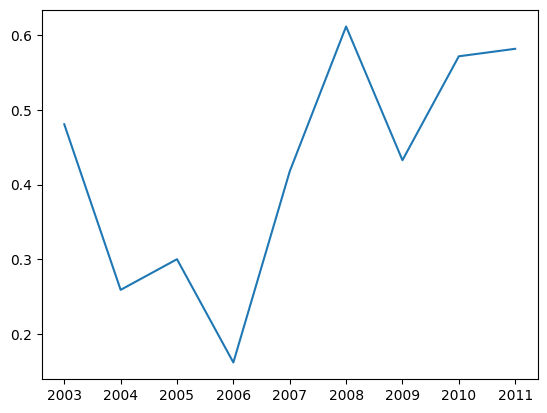

In [132]:
plt.plot(result)

## Group-Wise Linear Regression

In [133]:
import statsmodels.api as sm

In [134]:
def regress(data, yvar, xvar):
    y = data[yvar]
    x = data[xvar]
    x['intercept'] = 1
    result = sm.OLS(y, x).fit()
    return result.params

In [135]:
by_year.apply(regress, yvar= 'AAPL', xvar= ['SPX'])

,SPX,intercept
2003,1.195406,0.000710
2004,1.363463,0.004201
2005,1.766415,0.003246
2006,1.645496,0.000080
2007,1.198761,0.003438
2008,0.968016,-0.001110
2009,0.879103,0.002954
2010,1.052608,0.001261
2011,0.806605,0.001514


# Group Transforms and "Unwrapped" GroupBys

In [136]:
df = pd.DataFrame(
    {
        'key': ['a', 'b', 'c'] * 4,
        'value': np.arange(12)
    }
)

In [137]:
df

,key,value
0,a,0
1,b,1
2,c,2
3,a,3
4,b,4
5,c,5
6,a,6
7,b,7
8,c,8
9,a,9


In [138]:
grouped = df.groupby('key')['value']

In [139]:
grouped.mean()

key
a    4.5
b    5.5
c    6.5
Name: value, dtype: float64

In [140]:
def get_mean(group):
    return group.mean()

In [141]:
grouped.transform(get_mean)

0     4.5
1     5.5
2     6.5
3     4.5
4     5.5
5     6.5
6     4.5
7     5.5
8     6.5
9     4.5
10    5.5
11    6.5
Name: value, dtype: float64

In [142]:
grouped.transform('mean')

0     4.5
1     5.5
2     6.5
3     4.5
4     5.5
5     6.5
6     4.5
7     5.5
8     6.5
9     4.5
10    5.5
11    6.5
Name: value, dtype: float64

In [143]:
def two_times(group):
    return group * 2

In [145]:
grouped.transform(two_times)

0      0
1      2
2      4
3      6
4      8
5     10
6     12
7     14
8     16
9     18
10    20
11    22
Name: value, dtype: int64

In [146]:
def get_rank(group):
    return group.rank(ascending= False)

In [147]:
grouped.transform(get_rank)

0     4.0
1     4.0
2     4.0
3     3.0
4     3.0
5     3.0
6     2.0
7     2.0
8     2.0
9     1.0
10    1.0
11    1.0
Name: value, dtype: float64

In [148]:
def normalize(x):
    return (x - x.mean()) / x.std()

In [149]:
grouped.transform(normalize)

0    -1.161895
1    -1.161895
2    -1.161895
3    -0.387298
4    -0.387298
5    -0.387298
6     0.387298
7     0.387298
8     0.387298
9     1.161895
10    1.161895
11    1.161895
Name: value, dtype: float64

In [150]:
grouped.apply(normalize)

key    
a    0    -1.161895
     3    -0.387298
     6     0.387298
     9     1.161895
b    1    -1.161895
     4    -0.387298
     7     0.387298
     10    1.161895
c    2    -1.161895
     5    -0.387298
     8     0.387298
     11    1.161895
Name: value, dtype: float64

# Pivot Tables and Cross Tabulations

In [151]:
tips.head()

,total_bill,tip,smoker,day,time,size,tip_percentage
0,16.99,1.01,No,Sun,Dinner,2,0.059447
1,10.34,1.66,No,Sun,Dinner,3,0.160542
2,21.01,3.50,No,Sun,Dinner,3,0.166587
3,23.68,3.31,No,Sun,Dinner,2,0.139780
4,24.59,3.61,No,Sun,Dinner,4,0.146808


In [154]:
tips.pivot_table(index= ['day', 'smoker'], values= ['total_bill', 'tip', 'size', 'tip_percentage'])

size       tip  tip_percentage  total_bill
day  smoker                                                
Fri  No      2.250000  2.812500        0.151650   18.420000
     Yes     2.066667  2.714000        0.174783   16.813333
Sat  No      2.555556  3.102889        0.158048   19.661778
     Yes     2.476190  2.875476        0.147906   21.276667
Sun  No      2.929825  3.167895        0.160113   20.506667
     Yes     2.578947  3.516842        0.187250   24.120000
Thur No      2.488889  2.673778        0.160298   17.113111
     Yes     2.352941  3.030000        0.163863   19.190588

In [155]:
tips.pivot_table(index= ['time', 'day'], values= ['total_bill', 'tip_percentage'], columns= 'smoker')

tip_percentage           total_bill           
smoker                  No       Yes         No        Yes
time   day                                                
Dinner Fri        0.139622  0.165347  19.233333  19.806667
       Sat        0.158048  0.147906  19.661778  21.276667
       Sun        0.160113  0.187250  20.506667  24.120000
       Thur       0.159744       NaN  18.780000        NaN
Lunch  Fri        0.187735  0.188937  15.980000  12.323333
       Thur       0.160311  0.163863  17.075227  19.190588

In [157]:
tips.pivot_table(
    index= ['time', 'day'],
    values= ['size', 'tip_percentage'],
    columns= 'smoker',
    margins= True
)

size                     tip_percentage                    
smoker             No       Yes       All             No       Yes       All
time   day                                                                  
Dinner Fri   2.000000  2.222222  2.166667       0.139622  0.165347  0.158916
       Sat   2.555556  2.476190  2.517241       0.158048  0.147906  0.153152
       Sun   2.929825  2.578947  2.842105       0.160113  0.187250  0.166897
       Thur  2.000000       NaN  2.000000       0.159744       NaN  0.159744
Lunch  Fri   3.000000  1.833333  2.000000       0.187735  0.188937  0.188765
       Thur  2.500000  2.352941  2.459016       0.160311  0.163863  0.161301
All          2.668874  2.408602  2.569672       0.159328  0.163196  0.160803

In [159]:
tips.pivot_table(
    values= 'tip_percentage',
    index= ['time', 'smoker'],
    columns= 'day',
    aggfunc= 'count',
    margins= True
)

day             Fri   Sat   Sun  Thur  All
time   smoker                             
Dinner No       3.0  45.0  57.0   1.0  106
       Yes      9.0  42.0  19.0   NaN   70
Lunch  No       1.0   NaN   NaN  44.0   45
       Yes      6.0   NaN   NaN  17.0   23
All            19.0  87.0  76.0  62.0  244

In [161]:
tips.pivot_table(
    values= 'tip_percentage',
    index= ['time', 'size', 'smoker'],
    columns= 'day',
    margins= True,
    fill_value= 0
)

day                      Fri       Sat       Sun      Thur       All
time   size smoker                                                  
Dinner 1    No      0.000000  0.137931  0.000000  0.000000  0.137931
            Yes     0.000000  0.325733  0.000000  0.000000  0.325733
       2    No      0.139622  0.162705  0.168859  0.159744  0.164383
            Yes     0.171297  0.148668  0.207893  0.000000  0.167246
       3    No      0.000000  0.154661  0.152663  0.000000  0.153705
            Yes     0.000000  0.144995  0.152660  0.000000  0.148061
       4    No      0.000000  0.150096  0.148143  0.000000  0.148737
            Yes     0.117750  0.124515  0.193370  0.000000  0.139064
       5    No      0.000000  0.000000  0.206928  0.000000  0.206928
            Yes     0.000000  0.106572  0.065660  0.000000  0.086116
       6    No      0.000000  0.000000  0.103799  0.000000  0.103799
Lunch  1    No      0.000000  0.000000  0.000000  0.181728  0.181728
            Yes     0.223776  0.000000  0.000000  0.000000  0.223776
       2    No      0.000000  0.000000  0.000000  0.166005  0.166005
            Yes     0.181969  0.000000  0.000000  0.158843  0.165266
       3    No      0.187735  0.000000  0.000000  0.084246  0.118742
            Yes     0.000000  0.000000  0.000000  0.204952  0.204952
       4    No      0.000000  0.000000  0.000000  0.138919  0.138919
            Yes     0.000000  0.000000  0.000000  0.155410  0.155410
       5    No      0.000000  0.000000  0.000000  0.121389  0.121389
       6    No      0.000000  0.000000  0.000000  0.173706  0.173706
All                 0.169913  0.153152  0.166897  0.161276  0.160803

## Cross-Tabulation

In [165]:
from io import StringIO

In [166]:
data = """Sample  Nationality  Handedness
1   USA  Right-handed
2   Japan    Left-handed
3   USA  Right-handed
4   Japan    Right-handed
5   Japan    Left-handed
6   Japan    Right-handed
7   USA  Right-handed
8   USA  Left-handed
9   Japan    Right-handed
10  USA  Right-handed"""

In [170]:
df = pd.read_table(StringIO(data), sep= '\s+', engine= 'python')

In [171]:
df

,Sample,Nationality,Handedness
0,1,USA,Right-handed
1,2,Japan,Left-handed
2,3,USA,Right-handed
3,4,Japan,Right-handed
4,5,Japan,Left-handed
5,6,Japan,Right-handed
6,7,USA,Right-handed
7,8,USA,Left-handed
8,9,Japan,Right-handed
9,10,USA,Right-handed


In [176]:
pd.crosstab(df.Nationality, df.Handedness)

Handedness,Left-handed,Right-handed
Nationality,,
Japan,2,3
USA,1,4


In [178]:
pd.crosstab(df.Nationality, df.Handedness, margins= True)

Handedness,Left-handed,Right-handed,All
Nationality,,,
Japan,2,3,5
USA,1,4,5
All,3,7,10


In [179]:
pd.crosstab(df.Nationality, df.Handedness, normalize= True)

Handedness,Left-handed,Right-handed
Nationality,,
Japan,0.2,0.3
USA,0.1,0.4


In [180]:
pd.crosstab(df.Nationality, df.Handedness, margins= True, normalize= True)

Handedness,Left-handed,Right-handed,All
Nationality,,,
Japan,0.2,0.3,0.5
USA,0.1,0.4,0.5
All,0.3,0.7,1.0


In [185]:
pd.crosstab([tips['time'], tips['day']], tips['smoker'], margins= True)

smoker        No  Yes  All
time   day                
Dinner Fri     3    9   12
       Sat    45   42   87
       Sun    57   19   76
       Thur    1    0    1
Lunch  Fri     1    6    7
       Thur   44   17   61
All          151   93  244